In [1]:
__author__='Xia Wang'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
s = json.load(open(os.getenv('PUI2015')+'/plotstyle.json'))
plt.rcParams.update(s)

%matplotlib inline

/Users/eliseowang/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Task 1

In [2]:
data = np.load(os.getenv('PUI2015')+'/HW6/MTA_Fare.npy')

In [3]:
print data.shape
names=np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])   

(600, 23, 194)


In [4]:
data = np.where(data != -1, data, np.nan)

In [5]:
# add up all the stations
by_ridetype_sum = np.nansum(data, axis=0)
# add up all ride types
by_station_sum = np.nansum(data, axis=1)

In [6]:
station1 = pd.DataFrame(by_station_sum.T)
station1.index = pd.date_range('5/21/2010',periods=194,freq='W-FRI')

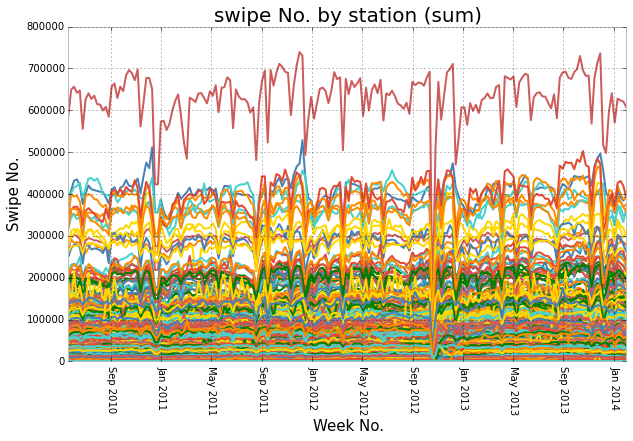

In [7]:
## plot with at natural scale
fig1 = plt.figure(figsize=(10,6))
fig1.add_subplot(111)
plt.plot(station1.index, station1)
plt.title('swipe No. by station (sum)',fontsize=20)
plt.xticks(rotation=270)
plt.xlabel('Week No.', fontsize=15)
plt.ylabel('Swipe No.', fontsize=15)

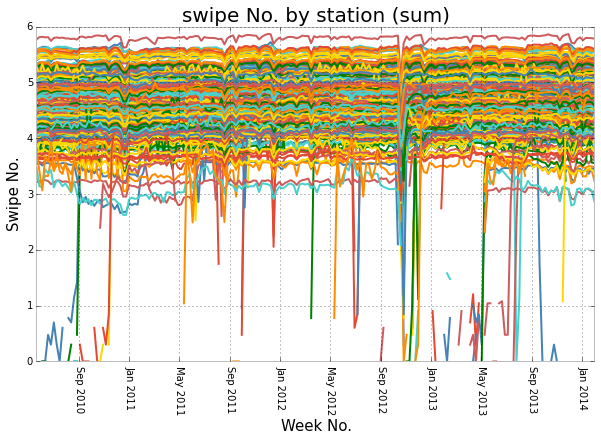

In [8]:
## plot with at log10 scale
fig1 = plt.figure(figsize=(10,6))
fig1.add_subplot(111)
plt.plot(station1.index, np.log10(station1))
plt.title('swipe No. by station (sum)',fontsize=20)
plt.xticks(rotation=270)
plt.xlabel('Week No.', fontsize=15)
plt.ylabel('Swipe No.', fontsize=15)

In [9]:
ridetype1 = pd.DataFrame(by_ridetype_sum.T)
ridetype1.columns = ['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
                    'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t','umlim',
                    'xbus','stud']
ridetype1.index = pd.date_range('5/21/2010',periods=194,freq='W-FRI')

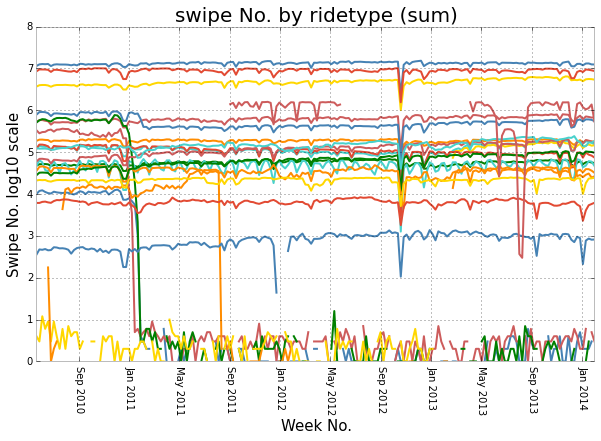

In [10]:
fig1 = plt.figure(figsize=(10,6))
fig1.add_subplot(111)
plt.plot(ridetype1.index, np.log10(ridetype1))
plt.title('swipe No. by ridetype (sum)',fontsize=20)
plt.xticks(rotation=270)
plt.xlabel('Week No.', fontsize=15)
plt.ylabel('Swipe No. log10 scale', fontsize=15)

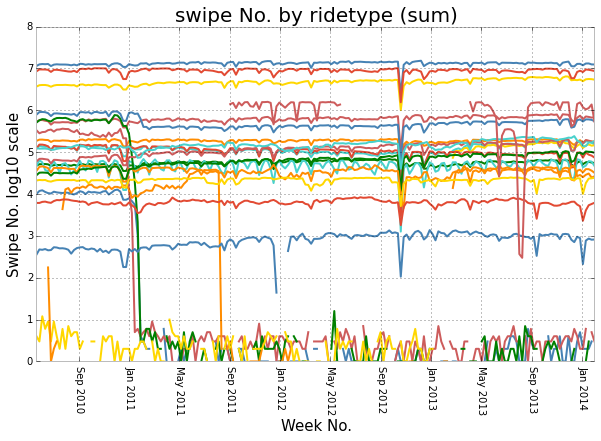

In [11]:
fig1 = plt.figure(figsize=(10,6))
fig1.add_subplot(111)
plt.plot(ridetype1.index, np.log10(ridetype1))
plt.title('swipe No. by ridetype (sum)',fontsize=20)
plt.xticks(rotation=270)
plt.xlabel('Week No.', fontsize=15)
plt.ylabel('Swipe No. log10 scale', fontsize=15)

In [12]:
by_ridetype_avg = np.nanmean(data, axis=0)
by_station_avg = np.nanmean(data, axis=1)

/Users/eliseowang/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [13]:
# print by_ridetype_avg.shape
# print by_station_avg.shape

In [14]:
ridetype = pd.DataFrame(by_ridetype_avg.T)

In [15]:
ridetype.columns = ['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
                    'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t','umlim',
                    'xbus','stud']

In [16]:
ridetype.index = pd.date_range('5/21/2010',periods=194,freq='W-FRI')

In [17]:
station = pd.DataFrame(by_station_avg.T)

In [18]:
station.index = pd.date_range('5/21/2010',periods=194,freq='W-FRI')

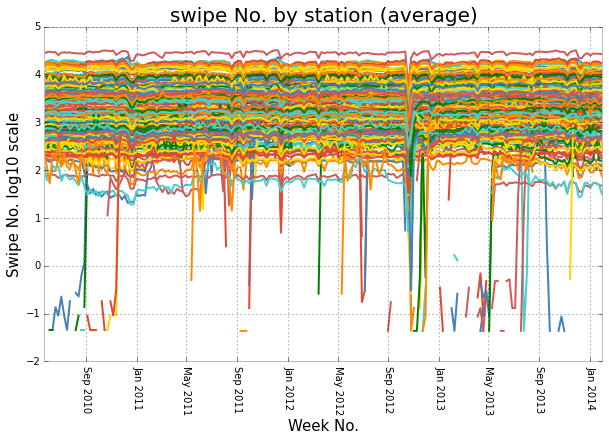

In [19]:
fig1 = plt.figure(figsize=(10,6))
fig1.add_subplot(111)
plt.plot(station.index, np.log10(station))
plt.title('swipe No. by station (average)', fontsize=20)
plt.xticks(rotation=270)
plt.xlabel('Week No.', fontsize=15)
plt.ylabel('Swipe No. log10 scale', fontsize=15)

<function matplotlib.pyplot.show>

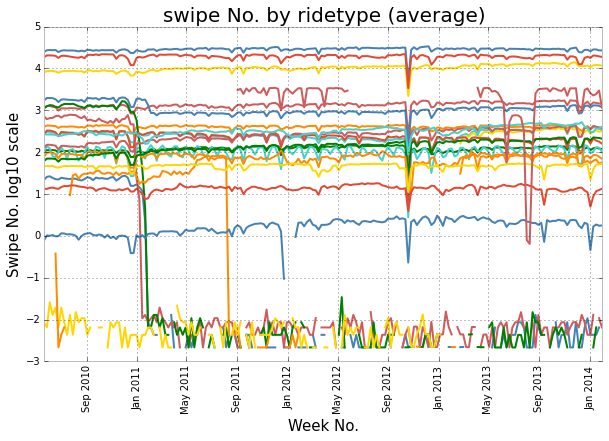

In [20]:
fig1 = plt.figure(figsize=(10,6))
fig1.add_subplot(111)
plt.plot(ridetype.index, np.log10(ridetype))
plt.title('swipe No. by ridetype (average)', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Week No.', fontsize=15)
plt.ylabel('Swipe No. log10 scale', fontsize=15)
#plt.grid()
plt.show

## By simply looking at the plots (both by station and by ridetype), we can detect a huge drop in the winter of 2012. I'll detect the event as an outlier using 3 standard deviations from mean as the critical value. And I'll only apply it to the swipe numbers by ridetype (average). The same code can be applied to other datasets.

In [21]:
ridetype_num = pd.DataFrame(by_ridetype_avg.T).convert_objects(convert_numeric=True)

/Users/eliseowang/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [22]:
ridetype_num.loc['sigma'] = ridetype_num.std()
ridetype_num.loc['mean'] = ridetype_num.mean()
ridetype_num.loc['critical min'] = ridetype_num.loc['mean'] - 3.0*ridetype_num.loc['sigma']
ridetype_num.loc['critical max'] = ridetype_num.loc['mean'] + 3.0*ridetype_num.loc['sigma']

In [23]:
# calculate if any value in the dataframe is an outliers
eventsmin = np.where(ridetype_num < ridetype_num.loc['critical min'])
eventsmax = np.where(ridetype_num > ridetype_num.loc['critical max'])[0]

In [24]:
print eventsmin

(array([ 30,  31,  95, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126,
       126, 126, 134, 173, 173, 189, 189, 194, 194, 194, 194, 194, 194,
       194, 194, 194, 194, 194]), array([ 6,  6, 19,  0,  1,  2,  3,  4,  5,  6, 11, 13, 18, 19, 20,  6, 19,
       20, 19, 20,  0,  1,  2,  3,  5,  6, 11, 13, 18, 19, 20]))


In [25]:
events = np.array(eventsmin[0])
np.unique(events)

array([ 30,  31,  95, 126, 134, 173, 189, 194])

## According to the calculation, week 126, 173 189 and 194 have outliers. As we have seen previously in the plots, in week 126 the plot shows a sharp drop. Week 173, 189 are not very obvious on the plots though. As for week 126, the sharp drop was probably caused by Hurricane Sandy when the infrustructure was damaged and the use of metro dropped significantly.

## Task 2

In [26]:
from scipy import stats
import statsmodels.api as sm

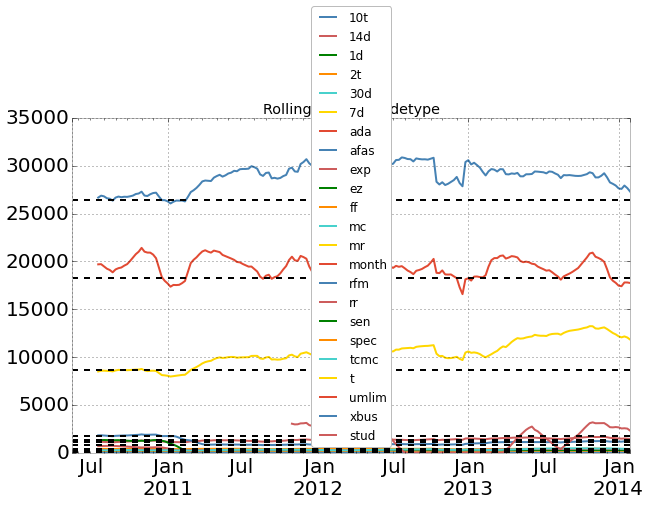

In [27]:
# I've tried different window numbers from 1 to 20 and I think 10 is a good fit.
pd.rolling_mean(ridetype, 10).plot(figsize=(10,6), 
                                   title='Rolling mean of ridetype', fontsize=20)
plt.legend(loc=8)
for x in ridetype.ix['2010-08-06']:
    plt.axhline(x, color='k',linestyle='--')

## 10t shows a growing trend, unlim is almost stable, 7d shows an even more obvious growing trend, and ada type dropped a little. The others are more difficult to detect by eyes. The whole result is shown below

In [28]:
ls1 = pd.rolling_mean(ridetype, 10).dropna().head(10)
ls2 = pd.rolling_mean(ridetype, 10).dropna().tail(10)

In [29]:
# I calculated the rolling mean for the first and last 10 weeks,
# the one by the other, and took the average
ls1.index = np.arange(10)
ls2.index = np.arange(10)
ratio = ls1/ls2
ratio.mean()

10t      1.068565
14d      0.886470
1d       1.061444
2t       1.023425
30d      0.978660
7d       0.825961
ada      1.089480
afas     0.286212
exp      0.887098
ez       1.539458
ff       0.000018
mc       0.658723
mr       0.000015
month    1.368264
rfm      0.735817
rr       0.683211
sen      0.674750
spec     0.986044
tcmc     0.722234
t        1.034100
umlim    1.136907
xbus     0.859339
stud     1.122207
dtype: float64

## The rolling std is shown below

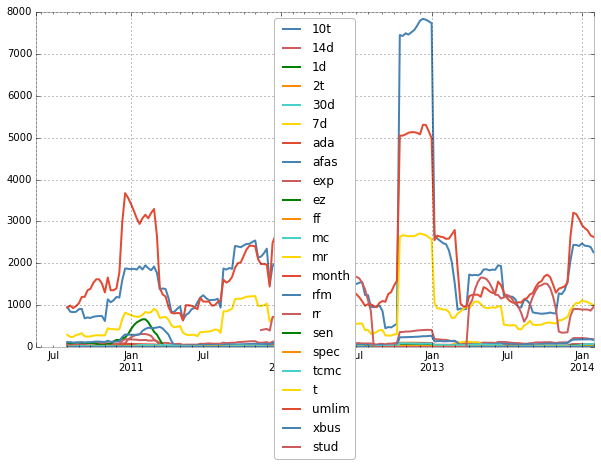

In [30]:
pd.rolling_std(ridetype, 12).plot(figsize=(10,6))
plt.legend(loc=9)

## Task 3

In [31]:
f = np.abs(np.fft.rfft(by_station_sum))
f.shape

(600, 98)

In [32]:
N =194
ffreq = np.fft.rfftfreq(N, 1.0)
ffreq.shape

(98,)

In [34]:
station2 = station1.T.astype(float)

(0, 0.1)

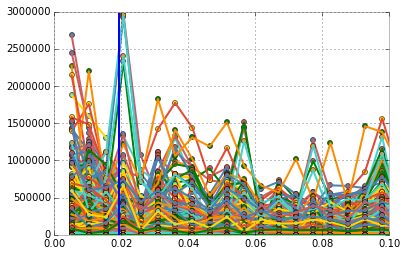

In [77]:
# plot'em all!
for i in range(600):
    f = np.abs(np.fft.rfft(station2.loc[i]))
    plt.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=5)
    plt.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
plt.axvline(1.0/52)
plt.xlim(0,0.1)

ERROR! Session/line number was not unique in database. History logging moved to new session 434


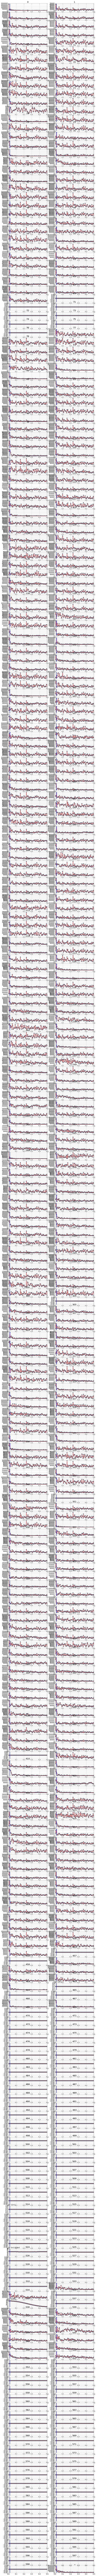

In [35]:
# to view it seperately
fig = plt.figure(figsize=(10,300))
for i in range(600):
    ax = fig.add_subplot(300,2,i)
    f = np.abs(np.fft.rfft(station2.loc[i]))
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=5)
    ax.set_title('%i' %(i-1))
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
    plt.axvline(1.0/52)

In [ ]:
# f = np.abs(np.fft.rfft(station2.loc[i]))
# plt.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=5)
# plt.set_title('%i' %(i-1))
# plt.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
# plt.axvline(1.0/52)

In [66]:
ls = []
for i in range(600):
    f = np.abs(np.fft.rfft(station2.loc[i]))
    ls.append(f)
four = pd.DataFrame(ls)

In [78]:
# four.T.plot(legend=False)
# plt.legend(loc=9)
# plt.xlim((0,1))
# # The plot is not really helpful, just for fun

In [37]:
# fig = plt.figure(figsize=(10,300))
# f = np.abs(np.fft.rfft(station2.loc[i]))
# ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=5)
# ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
# plt.axvline(1.0/52)

## By viewing all the plots, we can see the stations No. 149, 193, 326 and 600 are showing a stronger annual periodicity than other stations. 